<a href="https://colab.research.google.com/github/renhaa/faces/blob/master/StyleGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

if not tf.__version__ == "1.12.2":

  !pip install --upgrade tensorflow-gpu==1.12.2
  !wget https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
  !dpkg -i cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
  !apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub
  !apt-get update
  !apt-get install cuda=9.0.176-1
  !echo ****** Cuda reinstall completed. Restart runtime now! *******

assert tf.__version__ == "1.12.2"

if not "HAS_RUN_BEFORE" in vars():

  from google.colab import drive
  drive.mount('/content/gdrive', force_remount=True)
  %cd gdrive/My\ Drive/faces

  %run Tools.ipynb
  HAS_RUN_BEFORE = True

1.12.2


In [0]:
# !git clone https://github.com/pbaylies/stylegan-encoder
# !git clone https://github.com/NVlabs/stylegan.git
# !git clone https://github.com/tr1pzz/InterFaceGAN.git


In [0]:

!ls

'3D Reconstruction.ipynb'			      PCA.ipynb
 cache						      pretrained_models
 colab.ipynb					      README.md
'Copy of VQ-VAE training example'		      results
 cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb   samplefile.txt
 data						      SC-FEGAN.ipynb
 DCGAN.ipynb					      stylegan
 DownloadDataset.ipynb				      stylegan-encoder
 Faces.ipynb					      StyleGAN.ipynb
 haarcascade_frontalface_default.xml		      Tools.ipynb
'Inceotion Score.ipynb'				      VAE.ipynb
 InterFaceGAN					      vae_mlp_mnist.h5
 LICENSE.txt					      vae_mlp.png
 Makefile					      videos
 masks						      vrn
 output_videos


In [0]:
import sys
import os

import gdown
import PIL.Image
import numpy as np
import matplotlib.pyplot as plt
import pickle

import gdown

sys.path.insert(0, "stylegan")
sys.path.insert(0, "InterFaceGAN")
sys.path.insert(0, "stylegan-encoder")

from stylegan import dnnlib
from stylegan.dnnlib import tflib as tflib
from stylegan import config
# import dnnlib
# import tflib.dnnlib as tflib
# import config

def generate_images(generator, latent_vector, z = True):
    synthesis_kwargs = dict(output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True), minibatch_size=1)
    batch_size = latent_vector.shape[0]
    if z: #Start from z: run the full generator network
        return generator.run(latent_vector.reshape((batch_size, 512)), None, randomize_noise=False, **synthesis_kwargs)
    else: #Start from w: skip the mapping network
        return generator.components.synthesis.run(latent_vector.reshape((batch_size, 18, 512)), randomize_noise=False, **synthesis_kwargs)

# def interpolate(Gs,latents1,latents2, z = False, fname = None):
#     # rnd = np.random.RandomState(seed)
#     # latents1 = rnd.randn(1, Gs.input_shape[1])
#     # latents2 = rnd.randn(1, Gs.input_shape[1])
#     plot_imgs = []
#     for alpha in np.linspace(0,1,16):
#         latents =  latents1 - alpha*(latents1 - latents2)
#         # Generate image.
#         fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
#         images = Gs.run(latents, None, z=z , truncation_psi=0.7, randomize_noise=True, output_transform=fmt)
#         # Image(images[0]).pyplot()
#         plot_imgs.append(images[0])
#     plot_images(plot_imgs, nr=16, dim=(4,4), figsize=(10,10),fname = fname)

def plot_ramdom_samples(Gs, n = 8,seed = 42, fname = None):
    images = list()
    rnd = np.random.RandomState(seed)
    for i in range(n):
      random_vector = rnd.randn(1, Gs.input_shape[1])
      img = generate_images(Gs,random_vector)[0]
      images.append(img) 
    images = np.array(images)
    plot_images(images, fname = fname)

def interpolate(Gs,latents1,latents2, nr = 8, z = False):

    plot_imgs = []
    for alpha in np.linspace(0,1,nr):
        latent =  latents1 - alpha*(latents1 - latents2)
        # Generate image.
        latent = np.expand_dims(latent,axis = 0)
        #fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
        img =  generate_images(Gs, latent, z = z)
        # Image(images[0]).pyplot()
        plot_imgs.append(img[0])
    plot_imgs = np.array(plot_imgs)
    return plot_imgs
 


<module 'stylegan.dnnlib' from '/content/gdrive/My Drive/faces/stylegan/dnnlib/__init__.py'>

# Pretrained models



In [0]:

!mkdir -p pretrained_models/

resnet_url = "https://drive.google.com/uc?id=1aT59NFy9-bNyXjDuZOTMl0qX0jmZc6Zb"
resnet_path = "pretrained_models/finetuned_resnet.h5"
stylegan_ffhq_url = "https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ"
# stylegan_ffhq_path = "InterFaceGAN/models/pretrain/karras2019stylegan-ffhq-1024x1024.pkl"
stylegan_ffhq_path = "pretrained_models/karras2019stylegan-ffhq-1024x1024.pkl"

if not os.path.isfile(resnet_path):
  gdown.download(resnet_url,resnet_path,quiet=False)

if not os.path.isfile(stylegan_ffhq_path):
  gdown.download(stylegan_ffhq_url,stylegan_ffhq_path,quiet=False)



In [0]:

tflib.init_tf()
if not "Gs" in vars():
  with open(stylegan_ffhq_path,'rb') as f:
    _G, _D, Gs = pickle.load(f)


Saved to: results/stylegan/randomsamples.png


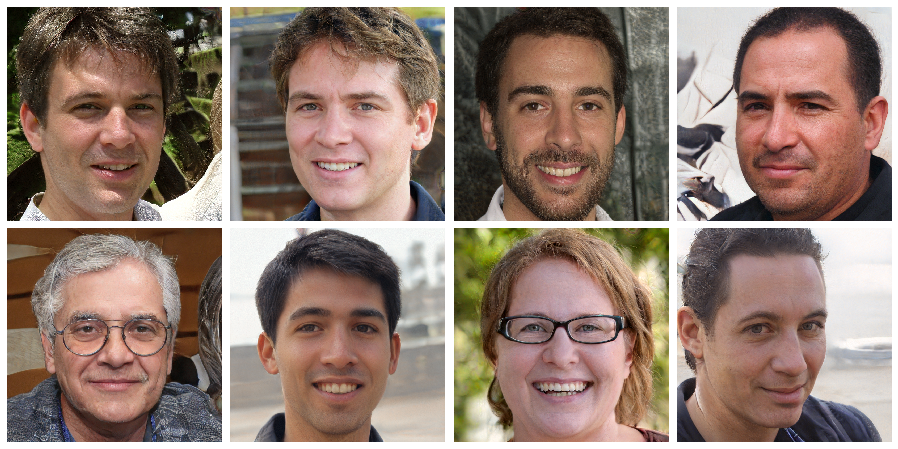

In [0]:

plot_ramdom_samples(Gs, n = 8,seed = 77, fname = "results/stylegan/randomsamples.png")

In [0]:
# from keras.models import load_model
 
# model = load_model(resnet_path)
# model.summary()

# random_vector = rnd.randn(1, G.input_shape[1])
# img = generate_images(Gs,random_vector)[0]
# img = np.expand_dims(img, axis = 0)
# model.predict(img)

# Encoder

In [0]:
## Query Images
!rm -r results/stylegan/query_images
!rm -r results/stylegan/query_images_aligned
!rm -r results/stylegan/query_images_reconstructed
!rm -r results/stylegan/query_images_latents

!mkdir -p results/stylegan/query_images
!mkdir -p results/stylegan/query_images_aligned
!mkdir -p results/stylegan/query_images_reconstructed
!mkdir -p results/stylegan/query_images_latents

!wget -c https://upload.wikimedia.org/wikipedia/commons/d/da/Lars_L%C3%B8kke_Rasmussen_-_2018_%28MUS6631%29_%28cropped%29.jpg -O results/stylegan/query_images/lars.jpg
!wget -c https://vignette.wikia.nocookie.net/da.uncyclopedia/images/e/e4/IngerSt%C3%B8jberg_01.jpg -O results/stylegan/query_images/inger.jpg
!wget -c https://upload.wikimedia.org/wikipedia/commons/9/98/Mette_Frederiksen_20120501.jpg -O results/stylegan/query_images/mette.jpg
!wget -c https://upload.wikimedia.org/wikipedia/commons/e/e0/Danmarks_kulturminister_Uffe_Elbaek_vid_Nordiska_Radets_session_2011_i_Kopenhamn.jpg -O results/stylegan/query_images/uffe.jpg
# !wget -P results/stylegan/query_images/ https://upload.wikimedia.org/wikipedia/commons/8/8d/President_Barack_Obama.jpg
# !wget -P results/stylegan/query_images/ https://upload.wikimedia.org/wikipedia/commons/5/56/Donald_Trump_official_portrait.jpg
# !wget -P results/stylegan/query_images/ https://vignette.wikia.nocookie.net/da.uncyclopedia/images/e/e4/IngerSt%C3%B8jberg_01.jpg
# !wget -P results/stylegan/query_images/ https://www.tnt.uni-hannover.de/staff/grasshof/portrait.jpg
# !wget -P results/stylegan/query_images/ https://cdn.cnn.com/cnnnext/dam/assets/171025171934-01-xi-jinping-life-gallery-super-169.jpg
# !wget -P results/stylegan/query_images/ https://lumiere-a.akamaihd.net/v1/images/c94eed56a5e84479a2939c9172434567c0147d4f.jpeg

# FACE EXTRACT AND ALIGN
!python stylegan-encoder/align_images.py results/stylegan/query_images/ results/stylegan/query_images_aligned/ --output_size=1048




--2019-12-02 13:11:24--  https://upload.wikimedia.org/wikipedia/commons/d/da/Lars_L%C3%B8kke_Rasmussen_-_2018_%28MUS6631%29_%28cropped%29.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 265271 (259K) [image/jpeg]
Saving to: ‘results/stylegan/query_images/lars.jpg’

results/stylegan/qu 100%[===================>] 259.05K  1.30MB/s    in 0.2s    

2019-12-02 13:11:24 (1.30 MB/s) - ‘results/stylegan/query_images/lars.jpg’ saved [265271/265271]

--2019-12-02 13:11:27--  https://vignette.wikia.nocookie.net/da.uncyclopedia/images/e/e4/IngerSt%C3%B8jberg_01.jpg
Resolving vignette.wikia.nocookie.net (vignette.wikia.nocookie.net)... 151.101.128.194, 151.101.64.194, 151.101.0.194, ...
Connecting to vignette.wikia.nocookie.net (vignette.wikia.nocookie.net)|151.101.128.194|:443... connected.
HTTP req

In [0]:

src_dir = "results/stylegan/query_images_aligned"
generated_images_dir = "results/stylegan/query_images_reconstructed"
dlatent_dir =  "results/stylegan/query_images_latents"

# !python stylegan-encoder/encode_images.py --batch_size=2 --output_video=True --load_resnet={resnet_path} --lr=0.01 --decay_rate=0.8 --iterations=250 --use_l1_penalty=0.3 {src_dir} {generated_images_dir} {dlatent_dir}


In [0]:
import PIL 
def combine_latent_vectors(input_dir = 'query_images_latents/',
                           #out_file = 'output_vectors.npy'
                           save_file = False):
  if not input_dir[-1] == "/":
    input_dir+="/"
  latents = sorted(os.listdir(input_dir))
  
  final_w_vectors = []
  for latent in latents:
    w = np.load(input_dir + latent)
    final_w_vectors.append(w)
  final_w_vectors = np.array(final_w_vectors)
  if save_file:
    np.save(save_file, final_w_vectors)
  return final_w_vectors


def load_images(input_dir):
  if not input_dir[-1] == "/":
    input_dir+="/"

  image_fnames = sorted(os.listdir(input_dir))

  images = []
  for fname in image_fnames:
    img = PIL.Image.open(input_dir + fname )
    images.append( np.array(img))
  images = np.array(images)

  return images

In [0]:
dlatents_fname = "results/stylegan/dlatents.npy"
latents = combine_latent_vectors(input_dir = dlatent_dir, save_file = dlatents_fname)

Saved to: results/stylegan/originals.png


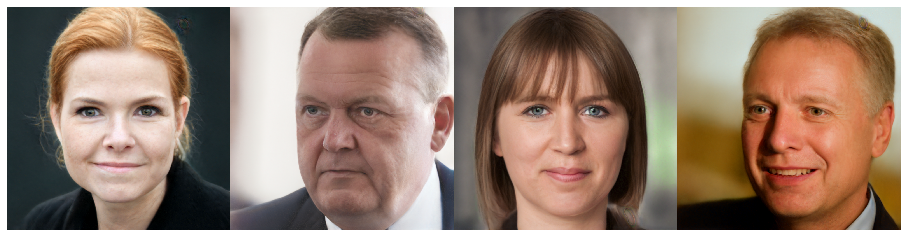

In [0]:

gen_images = generate_images(Gs,latents, z = False)
plot_images(gen_images, nr = 4, dim = (1,4),fname = "results/stylegan/originals.png")

In [0]:
orig_images = load_images(src_dir)
plot_images(orig_images, nr = 4, dim = (1,4),fname = "results/stylegan/reconstructions.png")


NameError: ignored

Saved to: results/stylegan/interpolation.png


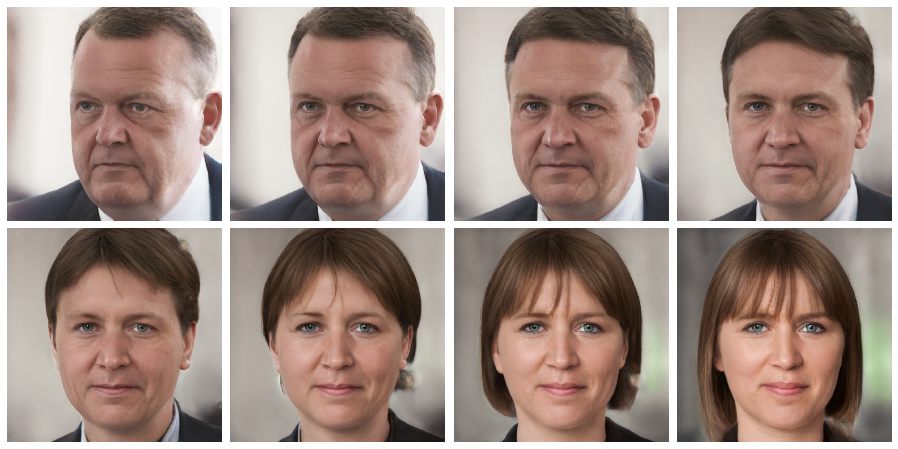

In [0]:
imterpolated_imgs = interpolate(Gs,latents[1],latents[2], nr = 8, z = False)
plot_images(imterpolated_imgs,fname = "results/stylegan/interpolation.png")


In [0]:
!mkdir -p results/stylegan/firstguess
import cv2

firstguess = []
for v in ["inger","lars","mette","uffe"]:
  inger = f"videos/{v}_01.avi"
  vidcap = cv2.VideoCapture(inger)
  success,image = vidcap.read()
  firstguess.append(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

firstguess = np.array(firstguess)
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# plt.savefig("results/stylegan/firstguess/uffe")

Saved to: results/stylegan/reconstructionsfirstguess.png


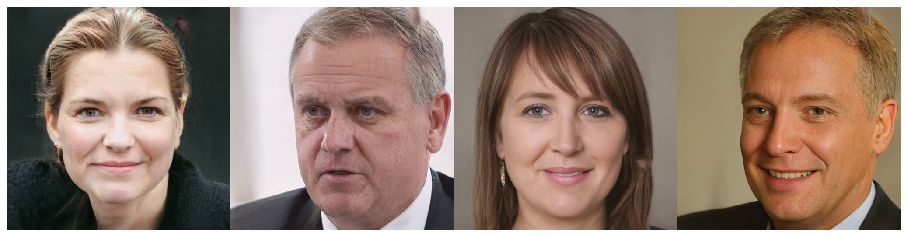

In [0]:
# plt.close()
# orig_images = load_images("results/stylegan/firstguess/")
plot_images(firstguess, nr = 4, dim = (1,4),fname = "results/stylegan/reconstructionsfirstguess.png")


In [0]:
# !wget -c https://www.clipartwiki.com/clipimg/full/55-555216_donald-duck-face-png.png -O results/stylegan/query_images_noface/and.png

!mkdir -p results/stylegan/query_images_noface
!mkdir -p results/stylegan/query_images_reconstructed_noface
!mkdir .p results/stylegan/query_images_latents_noface
src_dir = "results/stylegan/query_images_noface"
generated_images_dir = "results/stylegan/query_images_reconstructed_noface"
dlatent_dir =  "results/stylegan/query_images_latents_noface"

!python stylegan-encoder/encode_images.py --batch_size=2 --output_video=True --load_resnet={resnet_path} --lr=0.01 --decay_rate=0.8 --iterations=500 --use_l1_penalty=0.1 {src_dir} {generated_images_dir} {dlatent_dir}


mkdir: cannot create directory ‘.p’: File exists
mkdir: cannot create directory ‘results/stylegan/query_images_latents_noface’: File exists
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qi

--2019-12-15 21:29:50--  https://www.clipartwiki.com/clipimg/full/55-555216_donald-duck-face-png.png
Resolving www.clipartwiki.com (www.clipartwiki.com)... 208.110.80.77
Connecting to www.clipartwiki.com (www.clipartwiki.com)|208.110.80.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71314 (70K) [image/png]
Saving to: ‘results/stylegan/query_images_noface/and.png’

results/stylegan/qu 100%[===================>]  69.64K   428KB/s    in 0.2s    

2019-12-15 21:29:51 (428 KB/s) - ‘results/stylegan/query_images_noface/and.png’ saved [71314/71314]



# Face editing

In [0]:
# import os.path
# import argparse
# import cv2
# import numpy as np
# from tqdm import tqdm
# !rm -r results/stylegan/face_edit/
!mkdir -p results/stylegan/face_edit/

from InterFaceGAN.models.model_settings import MODEL_POOL
from InterFaceGAN.models.pggan_generator import PGGANGenerator
from InterFaceGAN.models.stylegan_generator import StyleGANGenerator
from InterFaceGAN.utils.logger import setup_logger
from InterFaceGAN.utils.manipulator import linear_interpolate

model = StyleGANGenerator("stylegan_ffhq")
kwargs = {'latent_space_type': "Wp"}
latent_codes = model.preprocess(latents, **kwargs)




[2019-12-16 01:59:05,358][INFO] Loading pytorch model from `InterFaceGAN/models/pretrain/stylegan_ffhq.pth`.
[2019-12-16 01:59:05,776][INFO] Successfully loaded!


In [0]:
morph_strength = 4           # Controls how strongly we push the face into a certain latent direction (try 1-5)
nr_interpolation_steps = 15  # The amount of intermediate steps/frames to render along the interpolation path
for latent_direction in  ["age"]: #['age', 'eyeglasses', 'gender', 'pose', 'smile']:
    boundary_file = 'InterFaceGAN/boundaries/stylegan_ffhq_%s_w_boundary.npy' %latent_direction
    boundary = np.load(boundary_file)
    if 1:
      !rm -r results/stylegan/face_edit/{latent_direction}
      !python InterFaceGAN/edit.py \
        -m stylegan_ffhq \
        -b {boundary_file} \
        -s Wp \
        -i {dlatents_fname} \
        -o results/stylegan/face_edit/{latent_direction} \
        --start_distance -{morph_strength} \
        --end_distance {morph_strength} \
        --steps={nr_interpolation_steps}

[2019-12-16 02:02:29,673][INFO] Initializing generator.
[2019-12-16 02:02:29,881][INFO] Loading pytorch model from `InterFaceGAN/models/pretrain/stylegan_ffhq.pth`.
[2019-12-16 02:02:30,256][INFO] Successfully loaded!
[2019-12-16 02:02:33,118][INFO] Preparing boundary.
[2019-12-16 02:02:33,126][INFO] Preparing latent codes.
[2019-12-16 02:02:33,127][INFO]   Load latent codes from `results/stylegan/dlatents.npy`.
[2019-12-16 02:02:33,131][INFO] Editing 4 samples.
[2019-12-16 02:02:40,108][INFO] Successfully edited 4 samples.


In [0]:
morph_strength = 4           # Controls how strongly we push the face into a certain latent direction (try 1-5)
nr_interpolation_steps = 15  # The amount of intermediate steps/frames to render along the interpolation path

boundary_file = 'InterFaceGAN/boundaries/stylegan_ffhq_age_c_eyeglasses_boundary.npy' 
boundary = np.load(boundary_file)
if 1:
  !rm -r results/stylegan/face_edit/age_c_glasses
  !python InterFaceGAN/edit.py \
    -m stylegan_ffhq \
    -b {boundary_file} \
    -s Wp \
    -i {dlatents_fname} \
    -o results/stylegan/face_edit/age_c_glasses \
    --start_distance -{morph_strength} \
    --end_distance {morph_strength} \
    --steps={nr_interpolation_steps}

[2019-12-16 02:03:13,243][INFO] Initializing generator.
[2019-12-16 02:03:13,454][INFO] Loading pytorch model from `InterFaceGAN/models/pretrain/stylegan_ffhq.pth`.
[2019-12-16 02:03:13,827][INFO] Successfully loaded!
[2019-12-16 02:03:16,663][INFO] Preparing boundary.
[2019-12-16 02:03:16,671][INFO] Preparing latent codes.
[2019-12-16 02:03:16,672][INFO]   Load latent codes from `results/stylegan/dlatents.npy`.
[2019-12-16 02:03:16,676][INFO] Editing 4 samples.
[2019-12-16 02:03:23,535][INFO] Successfully edited 4 samples.


In [0]:

image_folder = 'results/%s' %latent_direction
video_fps = 12


from moviepy.editor import *
import cv2

out_path = 'output_videos/'

images = [img_path for img_path in sorted(os.listdir(image_folder)) if '.jpg' in img_path]
os.makedirs(out_path, exist_ok=True)

prev_id = None
img_sets = []
for img_path in images:
  img_id = img_path.split('_')[0]
  if img_id == prev_id: #append
    img_sets[-1].append(img_path)
    
  else: #start a new img set
    img_sets.append([])
    img_sets[-1].append(img_path)
  prev_id = img_id

print("Found %d image sets!\n" %len(img_sets))
if image_folder[-1] != '/':
  image_folder += '/'

def make_video(images, vid_name):
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    video = cv2.VideoWriter(vid_name, fourcc, video_fps, (1024, 1024))
    gen = {}
    for img in images:
      video.write(img)
    video.release()
    print('finished '+ vid_name)
    
    
for i in range(len(img_sets)):
  print("############################")
  print("\nGenerating video %d..." %i)
  set_images = []
  vid_name = out_path + 'out_video_%s_%02d.mp4' %(latent_direction,i)
  for img_path in img_sets[i]:
    set_images.append(cv2.imread(image_folder + img_path))

  set_images.extend(reversed(set_images))
  make_video(set_images, vid_name)

Found 2 image sets!

############################

Generating video 0...
finished output_videos/out_video_gender_00.mp4
############################

Generating video 1...
finished output_videos/out_video_gender_01.mp4


In [0]:
video_file_to_show = 1

clip = VideoFileClip('output_videos/out_video_%s_%02d.mp4' %(latent_direction, video_file_to_show))
clip.ipython_display(height=512, autoplay=1, loop=1)

In [0]:
# 

# Trash


In [0]:
# gan_type = MODEL_POOL[args.model_name]['gan_type']
# gan_type
# MODEL_POOL
# MODEL_POOL["stylegan_ffhq"]['gan_type']

#PGGANGenerator()

# model = StyleGANGenerator("stylegan_ffhq")

# # kwargs = {'latent_space_type': "Wp"}


# latent_codes.shape,latents.shape, boundary.shape

# python3.7
# """Edits latent codes with respect to given boundary.
# Basically, this file takes latent codes and a semantic boundary as inputs, and
# then shows how the image synthesis will change if the latent codes is moved
# towards the given boundary.
# NOTE: If you want to use W or W+ space of StyleGAN, please do not randomly
# sample the latent code, since neither W nor W+ space is subject to Gaussian
# distribution. Instead, please use `generate_data.py` to get the latent vectors
# from W or W+ space first, and then use `--input_latent_codes_path` option to
# pass in the latent vectors.
# """

# import os.path
# import argparse
# import cv2
# import numpy as np
# from tqdm import tqdm

# from models.model_settings import MODEL_POOL
# from models.pggan_generator import PGGANGenerator
# from models.stylegan_generator import StyleGANGenerator
# from utils.logger import setup_logger
# from utils.manipulator import linear_interpolate


# def parse_args():
#   """Parses arguments."""
#   parser = argparse.ArgumentParser(
#       description='Edit image synthesis with given semantic boundary.')
#   parser.add_argument('-m', '--model_name', type=str, required=True,
#                       choices=list(MODEL_POOL),
#                       help='Name of the model for generation. (required)')
#   parser.add_argument('-o', '--output_dir', type=str, required=True,
#                       help='Directory to save the output results. (required)')
#   parser.add_argument('-b', '--boundary_path', type=str, required=True,
#                       help='Path to the semantic boundary. (required)')
#   parser.add_argument('-i', '--input_latent_codes_path', type=str, default='',
#                       help='If specified, will load latent codes from given '
#                            'path instead of randomly sampling. (optional)')
#   parser.add_argument('-n', '--num', type=int, default=1,
#                       help='Number of images for editing. This field will be '
#                            'ignored if `input_latent_codes_path` is specified. '
#                            '(default: 1)')
#   parser.add_argument('-s', '--latent_space_type', type=str, default='z',
#                       choices=['z', 'Z', 'w', 'W', 'wp', 'wP', 'Wp', 'WP'],
#                       help='Latent space used in Style GAN. (default: `Z`)')
#   parser.add_argument('--start_distance', type=float, default=-3.0,
#                       help='Start point for manipulation in latent space. '
#                            '(default: -3.0)')
#   parser.add_argument('--end_distance', type=float, default=3.0,
#                       help='End point for manipulation in latent space. '
#                            '(default: 3.0)')
#   parser.add_argument('--steps', type=int, default=10,
#                       help='Number of steps for image editing. (default: 10)')

#   return parser.parse_args()


# def main():
#   """Main function."""
#   args = parse_args()
#   logger = setup_logger(args.output_dir, logger_name='generate_data')

#   logger.info(f'Initializing generator.')
#   gan_type = MODEL_POOL[args.model_name]['gan_type']
#   if gan_type == 'pggan':
#     model = PGGANGenerator(args.model_name, logger)
#     kwargs = {}
#   elif gan_type == 'stylegan':
#     model = StyleGANGenerator(args.model_name, logger)
#     kwargs = {'latent_space_type': args.latent_space_type}
#   else:
#     raise NotImplementedError(f'Not implemented GAN type `{gan_type}`!')

#   logger.info(f'Preparing boundary.')
#   if not os.path.isfile(args.boundary_path):
#     raise ValueError(f'Boundary `{args.boundary_path}` does not exist!')
#   boundary = np.load(args.boundary_path)
#   np.save(os.path.join(args.output_dir, 'boundary.npy'), boundary)

#   logger.info(f'Preparing latent codes.')
#   if os.path.isfile(args.input_latent_codes_path):
#     logger.info(f'  Load latent codes from `{args.input_latent_codes_path}`.')
#     latent_codes = np.load(args.input_latent_codes_path)
#     latent_codes = model.preprocess(latent_codes, **kwargs)
#   else:
#     logger.info(f'  Sample latent codes randomly.')
#     latent_codes = model.easy_sample(args.num, **kwargs)
#   np.save(os.path.join(args.output_dir, 'latent_codes.npy'), latent_codes)
#   total_num = latent_codes.shape[0]

#   logger.info(f'Editing {total_num} samples.')
#   for sample_id in tqdm(range(total_num), leave=False):
#     interpolations = linear_interpolate(latent_codes[sample_id:sample_id + 1],
#                                         boundary,
#                                         start_distance=args.start_distance,
#                                         end_distance=args.end_distance,
#                                         steps=args.steps)
#     interpolation_id = 0
#     for interpolations_batch in model.get_batch_inputs(interpolations):
#       if gan_type == 'pggan':
#         outputs = model.easy_synthesize(interpolations_batch)
#       elif gan_type == 'stylegan':
#         outputs = model.easy_synthesize(interpolations_batch, **kwargs)
#       for image in outputs['image']:
#         save_path = os.path.join(args.output_dir,
#                                  f'{sample_id:03d}_{interpolation_id:03d}.jpg')
#         cv2.imwrite(save_path, image[:, :, ::-1])
#         interpolation_id += 1
#     assert interpolation_id == args.steps
#     logger.debug(f'  Finished sample {sample_id:3d}.')
#   logger.info(f'Successfully edited {total_num} samples.')


# def interpolate(Gs,latents1,latents2, z = False, fname = None):
#     # rnd = np.random.RandomState(seed)
#     # latents1 = rnd.randn(1, Gs.input_shape[1])
#     # latents2 = rnd.randn(1, Gs.input_shape[1])
#     plot_imgs = []
#     for alpha in np.linspace(0,1,16):
#         latents =  latents1 - alpha*(latents1 - latents2)
#         # Generate image.
#         fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
#         images = Gs.run(latents, None, z=z , truncation_psi=0.7, randomize_noise=True, output_transform=fmt)
#         # Image(images[0]).pyplot()
#         plot_imgs.append(images[0])
#     plot_images(plot_imgs, nr=16, dim=(4,4), figsize=(10,10),fname = fname)

# G = pretrained_stylegan()


# synthesis_kwargs = dict(output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True), minibatch_size=1)

# latent_folder = 'stylegan-encoder/latent_representations'
# zs = sorted(os.listdir(latent_folder))
# imgs = []
# latents = []
# for file in sorted(os.listdir(latent_folder)):
#   print(file)
#   w = np.load(f"{latent_folder}/{file}").reshape((1,18,-1))
#   latents.append(w)

# rnd = np.random.RandomState()
# rand_vector =  rnd.randn(1, G.input_shape[1])
# fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
# img = G.run(rand_vector, None, z=True , truncation_psi=0.7, randomize_noise=True, output_transform=fmt)
# plt.imshow(img[0])

# rnd = np.random.RandomState()

# random_vector = rnd.randn(10, G.input_shape[1])
# images = generate_images(G,random_vector)[0]
# images


# def pretrained_stylegan():

#     # Copyright (c) 2019, NVIDIA CORPORATION. All rights reserved.
#     #
#     # This work is licensed under the Creative Commons Attribution-NonCommercial
#     # 4.0 International License. To view a copy of this license, visit
#     # http://creativecommons.org/licenses/by-nc/4.0/ or send a letter to
#     # Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.


#     """Minimal script for generating an image using pre-trained StyleGAN generator."""



#     # Initialize TensorFlow.
#     tflib.init_tf()

#     # Load pre-trained network.
#     url = 'https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ' # karras2019stylegan-ffhq-1024x1024.pkl
#     with dnnlib.util.open_url(url, cache_dir=config.cache_dir) as f:
#         _G, _D, Gs = pickle.load(f)
#         # _G = Instantaneous snapshot of the generator. Mainly useful for resuming a previous training run.
#         # _D = Instantaneous snapshot of the discriminator. Mainly useful for resuming a previous training run.
#         # Gs = Long-term average of the generator. Yields higher-quality results than the instantaneous snapshot.

#     # Print network details.
#     # Gs.print_layers()

#     #plot_images(images_out, nr=16, dim=(4,4), figsize=(10,10),fname = 'stylegan_faces/example.png')
#     return Gs

  
# def plot_pretrained_images_sample():
#     rnd = np.random.RandomState()
#     images_out = []
#     for i in range(16):
#         latents = rnd.randn(1, Gs.input_shape[1])
#         # Generate image.
#         fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
#         images = Gs.run(latents, None, truncation_psi=0.7, randomize_noise=True, output_transform=fmt)
#         # Save image.
#         os.makedirs(config.result_dir, exist_ok=True)
#         # png_filename = os.path.join(config.result_dir, f'stylegan_faces/example{i}.png')
#         PIL.Image.fromarray(images[0], 'RGB').save(f'stylegan_faces/example{i}.png')
#         images_out.append(images[0])


# import os
# import argparse
# import pickle
# from tqdm import tqdm
# import PIL.Image
# import numpy as np
# import dnnlib
# import dnnlib.tflib as tflib
# import config
# from encoder.generator_model import Generator
# from encoder.perceptual_model import PerceptualModel, load_images
# from keras.models import load_model

# def split_to_batches(l, n):
#     for i in range(0, len(l), n):
#         yield l[i:i + n]




# def main():
#     parser = argparse.ArgumentParser(description='Find latent representation of reference images using perceptual losses', formatter_class=argparse.ArgumentDefaultsHelpFormatter)
#     parser.add_argument('src_dir',default =  help='Directory with images for encoding')
#     parser.add_argument('generated_images_dir', help='Directory for storing generated images')
#     parser.add_argument('dlatent_dir', help='Directory for storing dlatent representations')
#     parser.add_argument('--data_dir', default='data', help='Directory for storing optional models')
#     parser.add_argument('--mask_dir', default='masks', help='Directory for storing optional masks')
#     parser.add_argument('--load_last', default='', help='Start with embeddings from directory')
#     parser.add_argument('--dlatent_avg', default='', help='Use dlatent from file specified here for truncation instead of dlatent_avg from Gs')
#     parser.add_argument('--model_url', default='https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ', help='Fetch a StyleGAN model to train on from this URL') # karras2019stylegan-ffhq-1024x1024.pkl
#     parser.add_argument('--model_res', default=1024, help='The dimension of images in the StyleGAN model', type=int)
#     parser.add_argument('--batch_size', default=1, help='Batch size for generator and perceptual model', type=int)

#     # Perceptual model params
#     parser.add_argument('--image_size', default=256, help='Size of images for perceptual model', type=int)
#     parser.add_argument('--resnet_image_size', default=256, help='Size of images for the Resnet model', type=int)
#     parser.add_argument('--lr', default=0.02, help='Learning rate for perceptual model', type=float)
#     parser.add_argument('--decay_rate', default=0.9, help='Decay rate for learning rate', type=float)
#     parser.add_argument('--iterations', default=100, help='Number of optimization steps for each batch', type=int)
#     parser.add_argument('--decay_steps', default=10, help='Decay steps for learning rate decay (as a percent of iterations)', type=float)
#     parser.add_argument('--load_effnet', default='data/finetuned_effnet.h5', help='Model to load for EfficientNet approximation of dlatents')
#     parser.add_argument('--load_resnet', default='data/finetuned_resnet.h5', help='Model to load for ResNet approximation of dlatents')

#     # Loss function options
#     parser.add_argument('--use_vgg_loss', default=0.4, help='Use VGG perceptual loss; 0 to disable, > 0 to scale.', type=float)
#     parser.add_argument('--use_vgg_layer', default=9, help='Pick which VGG layer to use.', type=int)
#     parser.add_argument('--use_pixel_loss', default=1.5, help='Use logcosh image pixel loss; 0 to disable, > 0 to scale.', type=float)
#     parser.add_argument('--use_mssim_loss', default=100, help='Use MS-SIM perceptual loss; 0 to disable, > 0 to scale.', type=float)
#     parser.add_argument('--use_lpips_loss', default=100, help='Use LPIPS perceptual loss; 0 to disable, > 0 to scale.', type=float)
#     parser.add_argument('--use_l1_penalty', default=1, help='Use L1 penalty on latents; 0 to disable, > 0 to scale.', type=float)

#     # Generator params
#     parser.add_argument('--randomize_noise', default=False, help='Add noise to dlatents during optimization', type=bool)
#     parser.add_argument('--tile_dlatents', default=False, help='Tile dlatents to use a single vector at each scale', type=bool)
#     parser.add_argument('--clipping_threshold', default=2.0, help='Stochastic clipping of gradient values outside of this threshold', type=float)

#     # Masking params
#     parser.add_argument('--load_mask', default=False, help='Load segmentation masks', type=bool)
#     parser.add_argument('--face_mask', default=False, help='Generate a mask for predicting only the face area', type=bool)
#     parser.add_argument('--use_grabcut', default=True, help='Use grabcut algorithm on the face mask to better segment the foreground', type=bool)
#     parser.add_argument('--scale_mask', default=1.5, help='Look over a wider section of foreground for grabcut', type=float)

#     # Video params
#     parser.add_argument('--video_dir', default='videos', help='Directory for storing training videos')
#     parser.add_argument('--output_video', default=False, help='Generate videos of the optimization process', type=bool)
#     parser.add_argument('--video_codec', default='MJPG', help='FOURCC-supported video codec name')
#     parser.add_argument('--video_frame_rate', default=24, help='Video frames per second', type=int)
#     parser.add_argument('--video_size', default=512, help='Video size in pixels', type=int)
#     parser.add_argument('--video_skip', default=1, help='Only write every n frames (1 = write every frame)', type=int)

#     args, other_args = parser.parse_known_args()

#     args.decay_steps *= 0.01 * args.iterations # Calculate steps as a percent of total iterations

#     if args.output_video:
#       import cv2
#       synthesis_kwargs = dict(output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=False), minibatch_size=args.batch_size)

#     ref_images = [os.path.join(args.src_dir, x) for x in os.listdir(args.src_dir)]
#     ref_images = list(filter(os.path.isfile, ref_images))

#     if len(ref_images) == 0:
#         raise Exception('%s is empty' % args.src_dir)

#     os.makedirs(args.data_dir, exist_ok=True)
#     os.makedirs(args.mask_dir, exist_ok=True)
#     os.makedirs(args.generated_images_dir, exist_ok=True)
#     os.makedirs(args.dlatent_dir, exist_ok=True)
#     os.makedirs(args.video_dir, exist_ok=True)

#     # Initialize generator and perceptual model
#     tflib.init_tf()
#     with dnnlib.util.open_url(args.model_url, cache_dir=config.cache_dir) as f:
#         generator_network, discriminator_network, Gs_network = pickle.load(f)

#     generator = Generator(Gs_network, args.batch_size, clipping_threshold=args.clipping_threshold, tiled_dlatent=args.tile_dlatents, model_res=args.model_res, randomize_noise=args.randomize_noise)
#     if (args.dlatent_avg != ''):
#         generator.set_dlatent_avg(np.load(args.dlatent_avg))

#     perc_model = None
#     if (args.use_lpips_loss > 0.00000001):
#         with dnnlib.util.open_url('https://drive.google.com/uc?id=1N2-m9qszOeVC9Tq77WxsLnuWwOedQiD2', cache_dir=config.cache_dir) as f:
#             perc_model =  pickle.load(f)
#     perceptual_model = PerceptualModel(args, perc_model=perc_model, batch_size=args.batch_size)
#     perceptual_model.build_perceptual_model(generator)

#     ff_model = None

#     # Optimize (only) dlatents by minimizing perceptual loss between reference and generated images in feature space
#     for images_batch in tqdm(split_to_batches(ref_images, args.batch_size), total=len(ref_images)//args.batch_size):
#         names = [os.path.splitext(os.path.basename(x))[0] for x in images_batch]
#         if args.output_video:
#           video_out = {}
#           for name in names:
#             video_out[name] = cv2.VideoWriter(os.path.join(args.video_dir, f'{name}.avi'),cv2.VideoWriter_fourcc(*args.video_codec), args.video_frame_rate, (args.video_size,args.video_size))

#         perceptual_model.set_reference_images(images_batch)
#         dlatents = None
#         if (args.load_last != ''): # load previous dlatents for initialization
#             for name in names:
#                 dl = np.expand_dims(np.load(os.path.join(args.load_last, f'{name}.npy')),axis=0)
#                 if (dlatents is None):
#                     dlatents = dl
#                 else:
#                     dlatents = np.vstack((dlatents,dl))
#         else:
#             if (ff_model is None):
#                 if os.path.exists(args.load_resnet):
#                     print("Loading ResNet Model:")
#                     ff_model = load_model(args.load_resnet)
#                     from keras.applications.resnet50 import preprocess_input
#             if (ff_model is None):
#                 if os.path.exists(args.load_effnet):
#                     import efficientnet
#                     print("Loading EfficientNet Model:")
#                     ff_model = load_model(args.load_effnet)
#                     from efficientnet import preprocess_input
#             if (ff_model is not None): # predict initial dlatents with ResNet model
#                 dlatents = ff_model.predict(preprocess_input(load_images(images_batch,image_size=args.resnet_image_size)))
#         if dlatents is not None:
#             generator.set_dlatents(dlatents)
#         op = perceptual_model.optimize(generator.dlatent_variable, iterations=args.iterations)
#         pbar = tqdm(op, leave=False, total=args.iterations)
#         vid_count = 0
#         best_loss = None
#         best_dlatent = None
#         for loss_dict in pbar:
#             pbar.set_description(" ".join(names) + ": " + "; ".join(["{} {:.4f}".format(k, v)
#                     for k, v in loss_dict.items()]))
#             if best_loss is None or loss_dict["loss"] < best_loss:
#                 best_loss = loss_dict["loss"]
#                 best_dlatent = generator.get_dlatents()
#             if args.output_video and (vid_count % args.video_skip == 0):
#               batch_frames = generator.generate_images()
#               for i, name in enumerate(names):
#                 video_frame = PIL.Image.fromarray(batch_frames[i], 'RGB').resize((args.video_size,args.video_size),PIL.Image.LANCZOS)
#                 video_out[name].write(cv2.cvtColor(np.array(video_frame).astype('uint8'), cv2.COLOR_RGB2BGR))
#             generator.stochastic_clip_dlatents()
#         print(" ".join(names), " Loss {:.4f}".format(best_loss))

#         if args.output_video:
#             for name in names:
#                 video_out[name].release()

#         # Generate images from found dlatents and save them
#         generator.set_dlatents(best_dlatent)
#         generated_images = generator.generate_images()
#         generated_dlatents = generator.get_dlatents()
#         for img_array, dlatent, img_name in zip(generated_images, generated_dlatents, names):
#             img = PIL.Image.fromarray(img_array, 'RGB')
#             img.save(os.path.join(args.generated_images_dir, f'{img_name}.png'), 'PNG')
#             np.save(os.path.join(args.dlatent_dir, f'{img_name}.npy'), dlatent)

#         generator.reset_dlatents()

# generator = Generator(Gs, args.batch_size, clipping_threshold=args.clipping_threshold, tiled_dlatent=args.tile_dlatents, model_res=args.model_res, randomize_noise=args.randomize_noise)

# import math
# import tensorflow as tf
# import numpy as np
# import dnnlib.tflib as tflib
# from functools import partial

# src_dir = "results/stylegan/query_images_aligned"
# generated_images_dir = "results/stylegan/query_images_reconstructed"
# dlatent_dir =  "results/stylegan/query_images_latents"

# parser = argparse.ArgumentParser(description='Find latent representation of reference images using perceptual losses', formatter_class=argparse.ArgumentDefaultsHelpFormatter)
# parser.add_argument('--src_dir', default = src_dir, help='Directory with images for encoding')
# parser.add_argument('--generated_images_dir', default = generated_images_dir,  help='Directory for storing generated images')
# parser.add_argument('--dlatent_dir', default = dlatent_dir, help='Directory for storing dlatent representations')
# parser.add_argument('--data_dir', default='data', help='Directory for storing optional models')
# parser.add_argument('--mask_dir', default='masks', help='Directory for storing optional masks')
# parser.add_argument('--load_last', default='', help='Start with embeddings from directory')
# parser.add_argument('--dlatent_avg', default='', help='Use dlatent from file specified here for truncation instead of dlatent_avg from Gs')
# parser.add_argument('--model_url', default='https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ', help='Fetch a StyleGAN model to train on from this URL') # karras2019stylegan-ffhq-1024x1024.pkl
# parser.add_argument('--model_res', default=1024, help='The dimension of images in the StyleGAN model', type=int)
# parser.add_argument('--batch_size', default=1, help='Batch size for generator and perceptual model', type=int)



# # Perceptual model params
# parser.add_argument('--image_size', default=256, help='Size of images for perceptual model', type=int)
# parser.add_argument('--resnet_image_size', default=256, help='Size of images for the Resnet model', type=int)
# parser.add_argument('--lr', default=0.02, help='Learning rate for perceptual model', type=float)
# parser.add_argument('--decay_rate', default=0.9, help='Decay rate for learning rate', type=float)
# parser.add_argument('--iterations', default=100, help='Number of optimization steps for each batch', type=int)
# parser.add_argument('--decay_steps', default=10, help='Decay steps for learning rate decay (as a percent of iterations)', type=float)
# parser.add_argument('--load_effnet', default='data/finetuned_effnet.h5', help='Model to load for EfficientNet approximation of dlatents')
# parser.add_argument('--load_resnet', default = resnet_path, help='Model to load for ResNet approximation of dlatents')

# # Loss function options
# parser.add_argument('--use_vgg_loss', default=0.4, help='Use VGG perceptual loss; 0 to disable, > 0 to scale.', type=float)
# parser.add_argument('--use_vgg_layer', default=9, help='Pick which VGG layer to use.', type=int)
# parser.add_argument('--use_pixel_loss', default=1.5, help='Use logcosh image pixel loss; 0 to disable, > 0 to scale.', type=float)
# parser.add_argument('--use_mssim_loss', default=100, help='Use MS-SIM perceptual loss; 0 to disable, > 0 to scale.', type=float)
# parser.add_argument('--use_lpips_loss', default=100, help='Use LPIPS perceptual loss; 0 to disable, > 0 to scale.', type=float)
# parser.add_argument('--use_l1_penalty', default=1, help='Use L1 penalty on latents; 0 to disable, > 0 to scale.', type=float)

# # Generator params
# parser.add_argument('--randomize_noise', default=False, help='Add noise to dlatents during optimization', type=bool)
# parser.add_argument('--tile_dlatents', default=False, help='Tile dlatents to use a single vector at each scale', type=bool)
# parser.add_argument('--clipping_threshold', default=2.0, help='Stochastic clipping of gradient values outside of this threshold', type=float)

# # Masking params
# parser.add_argument('--load_mask', default=False, help='Load segmentation masks', type=bool)
# parser.add_argument('--face_mask', default=False, help='Generate a mask for predicting only the face area', type=bool)
# parser.add_argument('--use_grabcut', default=True, help='Use grabcut algorithm on the face mask to better segment the foreground', type=bool)
# parser.add_argument('--scale_mask', default=1.5, help='Look over a wider section of foreground for grabcut', type=float)

# # Video params
# parser.add_argument('--video_dir', default='videos', help='Directory for storing training videos')
# parser.add_argument('--output_video', default=False, help='Generate videos of the optimization process', type=bool)
# parser.add_argument('--video_codec', default='MJPG', help='FOURCC-supported video codec name')
# parser.add_argument('--video_frame_rate', default=24, help='Video frames per second', type=int)
# parser.add_argument('--video_size', default=512, help='Video size in pixels', type=int)
# parser.add_argument('--video_skip', default=1, help='Only write every n frames (1 = write every frame)', type=int)

# args, other_args = parser.parse_known_args()
# # Initialize generator and perceptual model
# tflib.init_tf()

# tf.get_variable('learnable_dlatents',
#             shape=(args.batch_size, 18, 512),
#             dtype='float32',
#             initializer=tf.initializers.random_normal())

# generator = Generator(Gs, args.batch_size, clipping_threshold=args.clipping_threshold, tiled_dlatent=args.tile_dlatents, model_res=args.model_res, randomize_noise=args.randomize_noise)

# # low_dim_dlatent = tf.get_variable('learnable_dlatents',
# #             shape=(batch_size, 512),
# #             dtype='float32',
# #             initializer=tf.initializers.random_normal())


